In [118]:
#importing neccessary librabries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [119]:
#find DATA job in US
df_US = df[df['job_country'] == 'United States'].copy()

In [120]:
#find top 3 roles
top_3_roles = df['job_title_short'].value_counts().sort_values(ascending=False).head(3).index

In [122]:
#create sorted dataframe groupby job_title_short, job_skills
df_US_exploded = df_US.explode('job_skills').copy()
roles_skills = df_US_exploded.groupby(['job_title_short', 'job_skills']).size()
df_roles_skills = roles_skills.reset_index(name='skills_count').sort_values(by='skills_count', ascending=False)

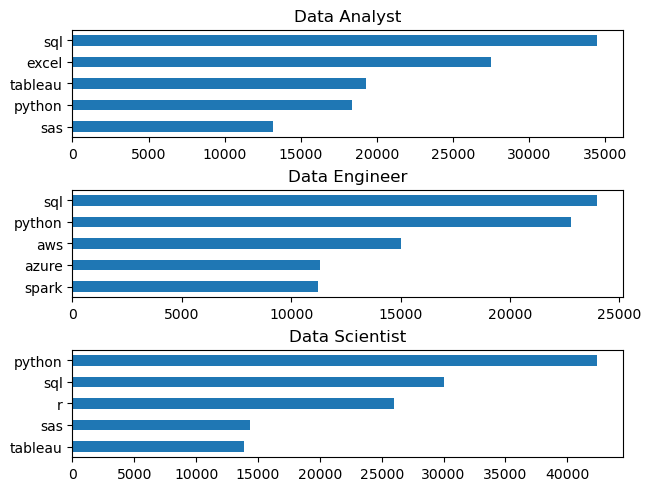

In [123]:
#plot
fig, ax = plt.subplots(len(top_3_roles), 1, constrained_layout =True)

for i, top_role in enumerate(top_3_roles):
    df_plot = df_roles_skills[df_roles_skills['job_title_short'] == top_role].head(5)
    df_plot.plot(kind='barh', x='job_skills', ax=ax[i], title = top_role) 
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].invert_yaxis()


In [ ]:
#create dataframe to count each roles
df_roles_count = df_US['job_title_short'].value_counts().reset_index(name='job_total')

In [ ]:
#caculate percentage of each skills
df_skills_perc = pd.merge(df_roles_skills, df_roles_count , how='left', on='job_title_short')

df_skills_perc['skill_perc'] = 100 * df_skills_perc['skills_count'] / df_skills_perc['job_total']

df_skills_perc


,job_title_short,job_skills,skills_count,job_total,skill_perc
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,elixir,1,9289,0.010765
1866,Software Engineer,sass,1,1814,0.055127
1867,Data Analyst,theano,1,67816,0.001475
1868,Software Engineer,theano,1,1814,0.055127


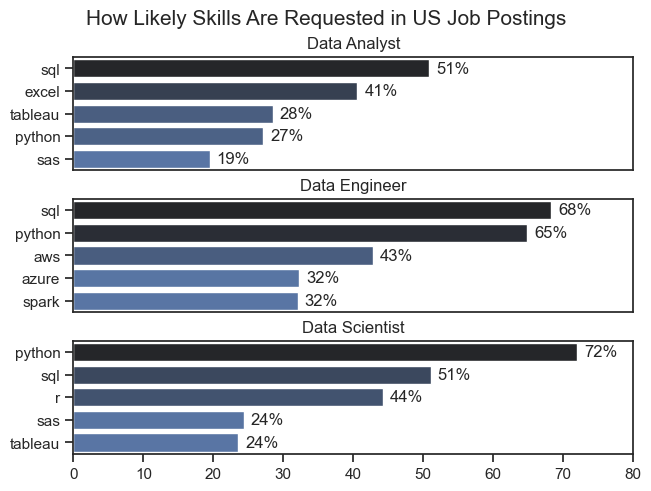

In [173]:
#plot
fig, ax = plt.subplots(len(top_3_roles), 1, constrained_layout =True)
sns.set_theme(style='ticks')

for i, top_role in enumerate(top_3_roles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == top_role].head(5)
    sns.barplot(data= df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue='skills_count', palette='dark:b_r')
    ax[i].set_title(top_role)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)

    if i != len(top_3_roles) -1:
        ax[i].set_xticks([])

    for n, v in enumerate(df_plot['skill_perc']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')

fig.suptitle('How Likely Skills Are Requested in US Job Postings', fontsize=15)
plt.show()
